In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from sklearn.datasets import load_boston

In [16]:
data=load_boston()

In [17]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [19]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [21]:
X=pd.DataFrame(data['data'],columns=data['feature_names'])
y=pd.Series(data['target'],name='target')


In [22]:
X.shape

(506, 13)

In [23]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [25]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: target, dtype: float64

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc=StandardScaler()

In [29]:
X1=sc.fit_transform(X)

In [30]:
from sklearn.model_selection import train_test_split

In [98]:
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.2,random_state=55)

In [31]:
from sklearn.model_selection import cross_val_score

<AxesSubplot:xlabel='target', ylabel='Count'>

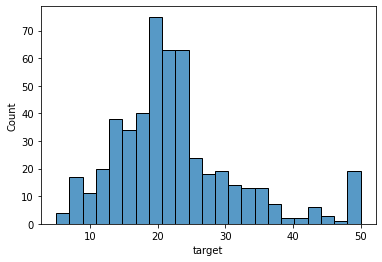

In [34]:
sns.histplot(y)

In [35]:
lr=LinearRegression()
r=Ridge()
l=Lasso()
e=ElasticNet()

In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [105]:
def outputs(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(mean_absolute_error(y_test,y_pred))
    df=pd.DataFrame({'cols':X.columns,'coefs':model.coef_})
    plt.figure(figsize=(8,6))
    plt.bar(df['cols'],df['coefs']);

2.977706609129127


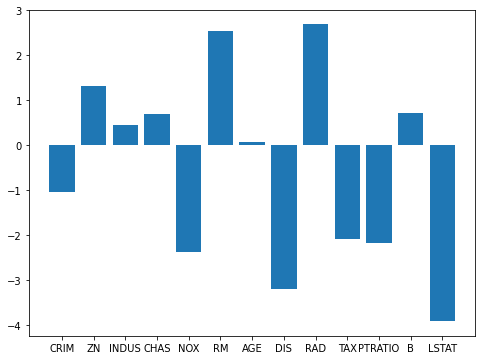

In [106]:
outputs(lr)

2.966457864098466


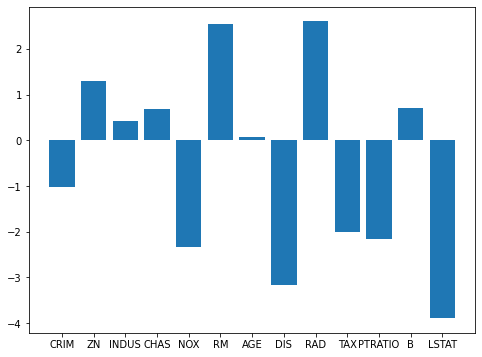

In [107]:
outputs(r)

3.333884758420228


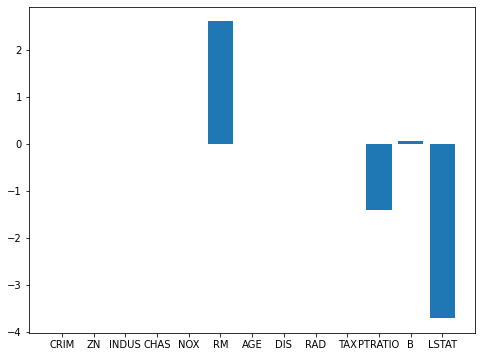

In [108]:
outputs(l)

3.3542552669280257


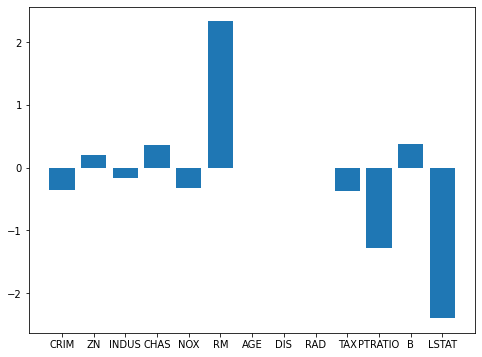

In [109]:
outputs(e)

In [43]:
from sklearn.metrics import mean_squared_error

In [47]:
from sklearn.metrics import SCORERS

In [48]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [ ]:
lr()

In [71]:
cross_val_score(lr,X1,y,cv=10,n_jobs=-1,scoring='neg_mean_squared_error').mean()

-34.70525594452481

In [72]:
cross_val_score(r,X1,y,cv=10,n_jobs=-1,scoring='neg_mean_squared_error').mean()

-34.553688206729525

In [73]:
cross_val_score(l,X1,y,cv=10,n_jobs=-1,scoring='neg_mean_squared_error').mean()

-37.865410649737534

In [74]:
cross_val_score(e,X1,y,cv=10,n_jobs=-1,scoring='neg_mean_squared_error').mean()

-37.29504406072819

In [ ]:
lr